# Tarea 3 Ejercicio 2 - Introducción a las Redes Neuronales y Deep Learning

**Nombre:** Bruno Morici

**ROL USM:** 202373555-8

**Curso:** INF395, Introducción a las Redes Neuronales y Deep Learning

**Profesor:** Alejandro Veloz

**Fecha:** 9/11/2025

# Evaluar modelo preentrenado de localización de objetos en imágenes

In [ ]:
%pip install ultralytics

In [4]:
import torch
# from torchvision.models.detection import FasterRCNN_ResNet50_FPN_Weights # Mas robusta y precisa
from ultralytics import YOLO # Simple, liviano, apto para tiempo real

In [5]:
# Descargamos el modelo base
model = YOLO("yolo11n.pt")

# Verificamos si se puede con GPU
print(torch.cuda.is_available())

False


In [6]:
# Entrenamos haciendo un Fine-Tuning (Modelamiento mas fino)
train_results = model.train(
    data="coco8.yaml", # Dataset de entrenamiento (Una muestra en este caso)
    epochs=100,
    imgsz=640,
    device="cpu", # 0: GPU
)

Ultralytics 8.3.228  Python-3.11.4 torch-2.9.0+cpu CPU (Intel Core i5-9300H 2.40GHz)
engine\trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=coco8.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train4, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained

In [7]:
# Evaluamos el rendimiento
metrics = model.val()

Ultralytics 8.3.228  Python-3.11.4 torch-2.9.0+cpu CPU (Intel Core i5-9300H 2.40GHz)
YOLO11n summary (fused): 100 layers, 2,616,248 parameters, 0 gradients, 6.5 GFLOPs
val: Fast image access  (ping: 0.10.0 ms, read: 211.9134.7 MB/s, size: 54.0 KB)
val: Scanning C:\Users\Bruno\Desktop\INF395 - IRN\tareas\datasets\coco8\labels\val.cache... 4 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 4/4 4.0Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 1.6it/s 0.6s
                   all          4         17      0.705      0.746      0.912      0.652
                person          3         10      0.764       0.65      0.666       0.33
                   dog          1          1      0.532          1      0.995      0.796
                 horse          1          2      0.722          1      0.995      0.676
              elephant          1          2      0.608      0.825      0.828      0.322
              umbr

Mostrando la imagen original:


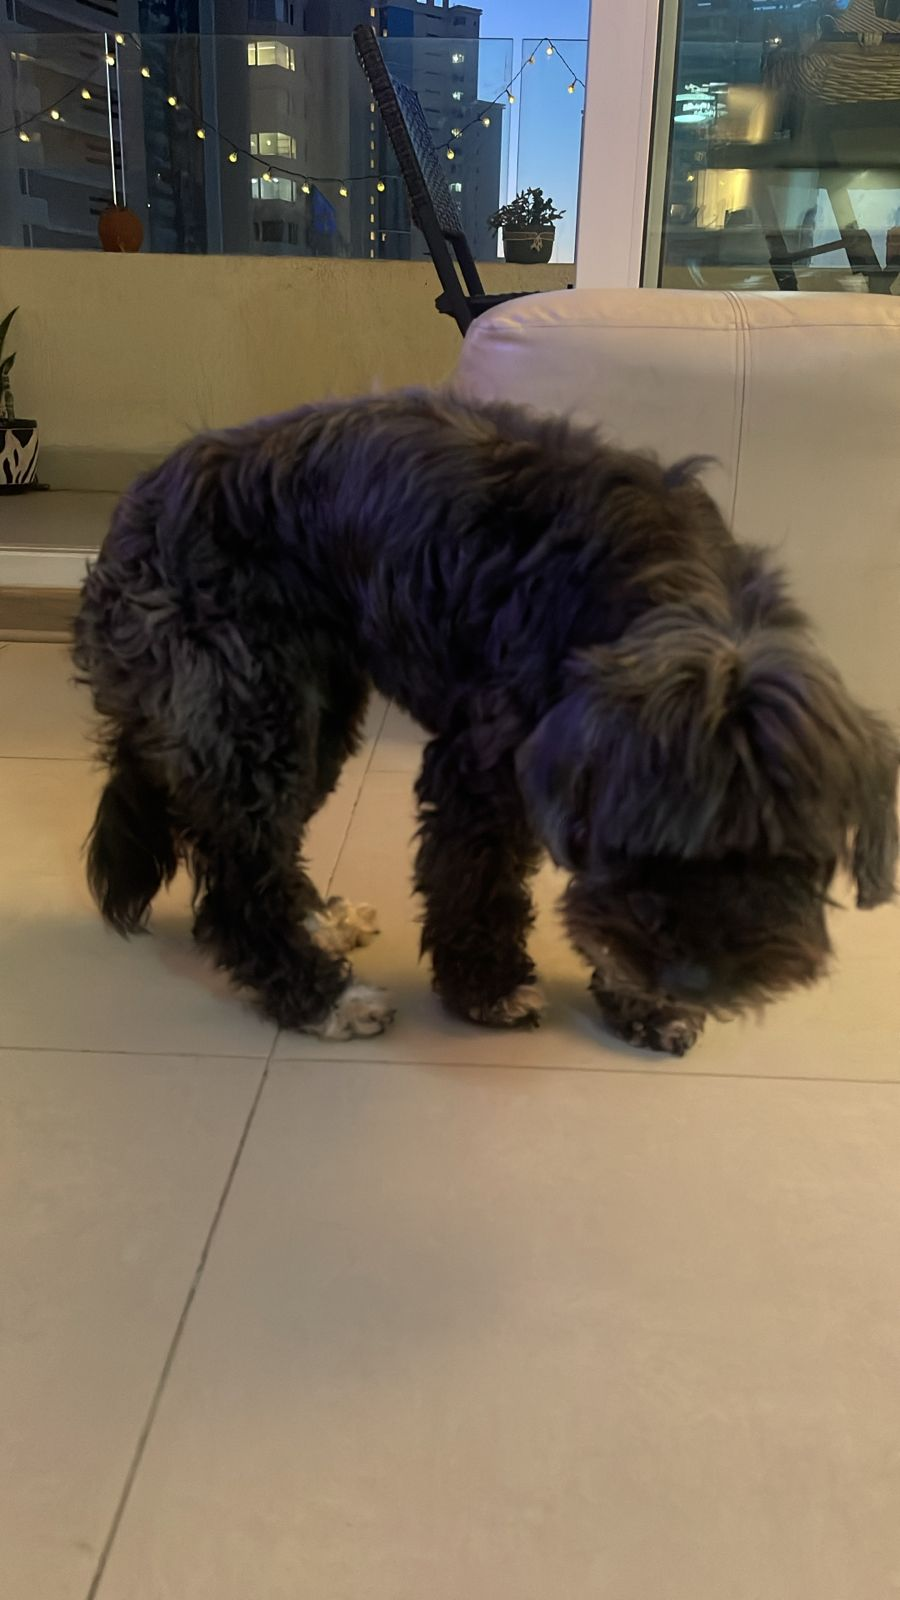


image 1/1 c:\Users\Bruno\Desktop\INF395 - IRN\tareas\tarea_3\negra.jpg: 640x384 1 dog, 1 potted plant, 143.1ms
Speed: 5.8ms preprocess, 143.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 384)
Mostrando la imagen con la detección INLINE:


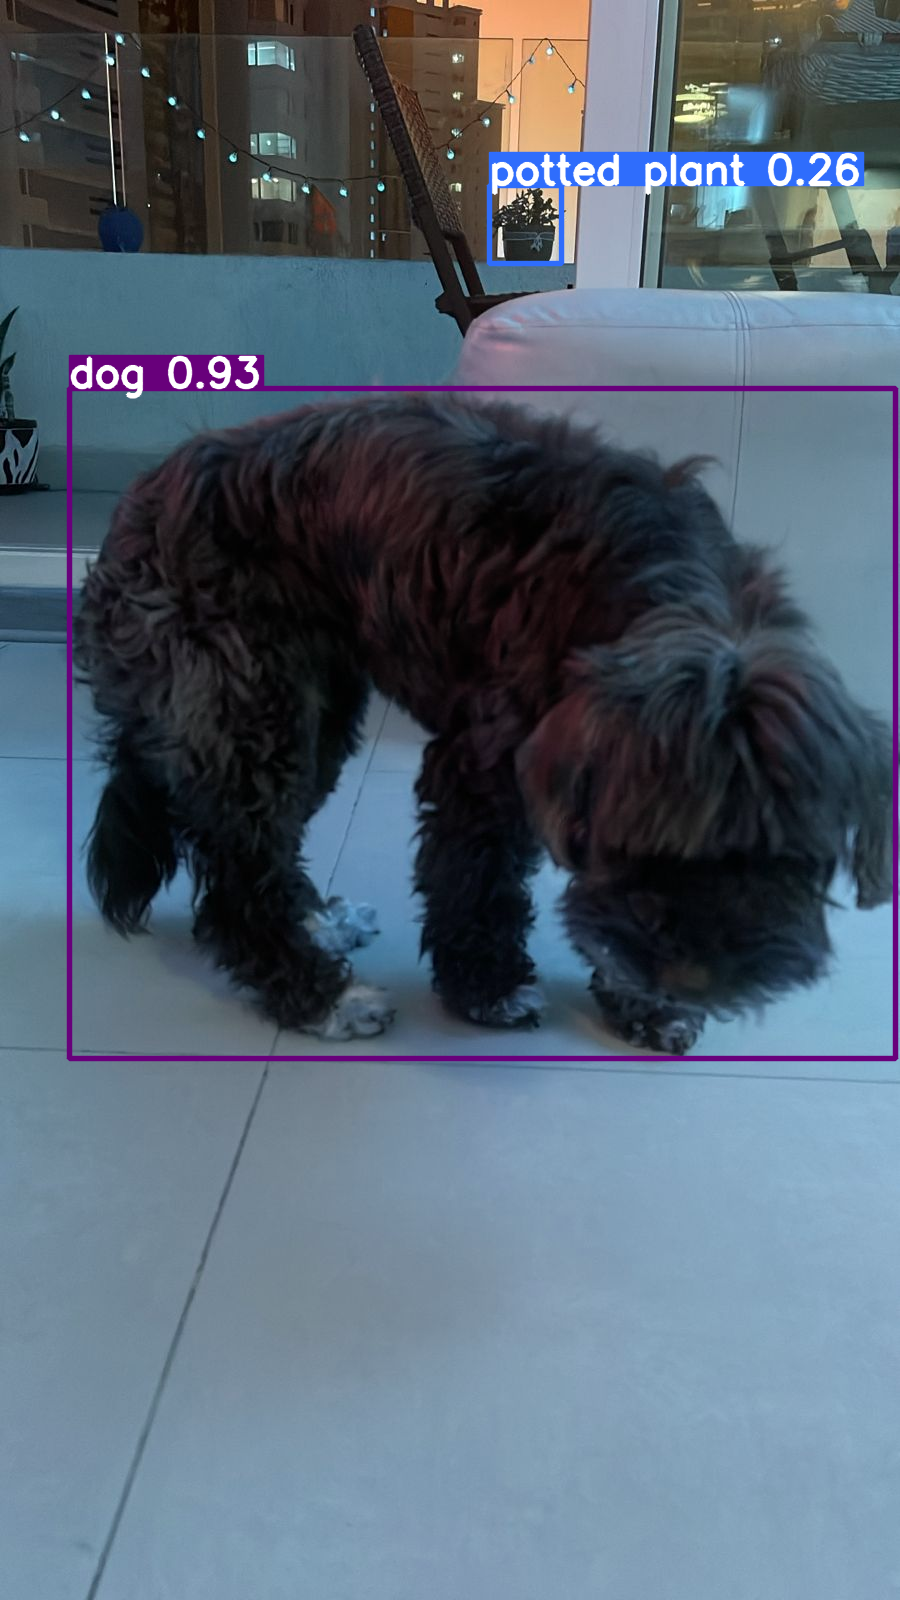

In [11]:
from PIL import Image
from IPython.display import display

# Ejemplo con mi perra "Negra" (La quiero mucho)
ruta_a_imagen_de_prueba = "negra.jpg"

# Mostramos la imagen original
original_image = Image.open(ruta_a_imagen_de_prueba)
print("Mostrando la imagen original:")
display(original_image)

# Ejecutamos la deteccion
results = model(ruta_a_imagen_de_prueba)

# Convervimos a un array para poder hacerle display en el notebook
im_array = results[0].plot()
im_pil = Image.fromarray(im_array)

# Mostramos en el notebook la prediccion
print("Mostrando la imagen con la detección INLINE:")
display(im_pil)

# Resultados de la Evaluación del Modelo YOLOv8n

La evaluación se realizó sobre el conjunto de validación del mini-dataset **COCO8** utilizando un modelo **YOLOv8n** ajustado (fine-tuned) y ejecutándose en CPU.

---

### 1. Métricas de Precisión

Las métricas mAP (mean Average Precision) indican el rendimiento del modelo en la localización y clasificación de objetos.

| Métrica | Descripción | Valor |
| :--- | :--- | :--- |
| **mAP50-95** | Precisión Promedio Media en umbrales de Intersection over Union (IoU) desde 50% hasta 95% (Métrica estricta). | **0.652** |
| **mAP50** | Precisión Promedio Media con umbral de IoU de 50% (Métrica más relajada). | **0.912** |
| **Precisión (P)** | Proporción de predicciones correctas sobre el total de predicciones. | **0.705** |
| **Recall (R)** | Proporción de objetos reales detectados sobre el total de objetos reales. | **0.746** |

**Conclusión de Precisión:** El modelo mantiene un rendimiento muy alto en detección básica (**mAP50: 91.2%**) y su rendimiento general en localización estricta es sólido (**mAP50-95: 65.2%**). En esta ejecución, la Precisión (0.705) mejoró ligeramente respecto al Recall (0.746).

---

### 2. Rendimiento por Clase (Detalle)

| Clase | Imágenes | Instancias | mAP50-95 | Notas Relevantes |
| :--- | :--- | :--- | :--- | :--- |
| **all** | 4 | 17 | **0.652** | Rendimiento promedio global. |
| **person** | 3 | 10 | 0.330 | Muestra el mAP más bajo, indicando dificultad en la localización precisa. |
| **dog** | 1 | 1 | 0.796 | Alta precisión y recall perfecto (1.0). |
| **horse** | 1 | 2 | 0.676 | Buen rendimiento general. |
| **elephant** | 1 | 2 | 0.322 | Muestra dificultad con las clases más escasas o complejas. |
| **umbrella** | 1 | 1 | 0.895 | Excelente rendimiento. |
| **potted plant** | 1 | 1 | 0.895 | Excelente rendimiento. |

---

### 3. Conclusiones

**Conclusión 1:** Es muy probable que la baja precisión se deba a que se hizo el entrenamiento con los "weights" básicos del modelo, y luego con un entrenamiento a 100 épocas sobre un dataset llamado COCO, pero solo 8 muestras del mismo, por lo que es esperable que el rendimiento no sea el mejor.

**Conclusión 2:** A su vez, YOLO es una arquitectura muy liviana y sencilla, lo que provoca que a su vez no sea tan robusta, por lo que se prioriza velocidad por sobre precisión, por eso las métricas de precisión son bajas.

**Conclusión 3:** A pesar de su baja precisión, su velocidad es superior, lo que genera que se puedan hacer detecciones en vivo, en webcams o videos, lo cual hace que YOLO siga siendo una opción muy interesante.